In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import cm


In [4]:
fruits=pd.read_csv('fruit_data_with_colors.txt', sep='\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [7]:
X = fruits[['height', 'width', 'mass', 'color_score']]
X.head()

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59
2,7.2,7.4,176,0.60
3,4.7,6.2,86,0.80
4,4.6,6.0,84,0.79


<IPython.core.display.Javascript object>


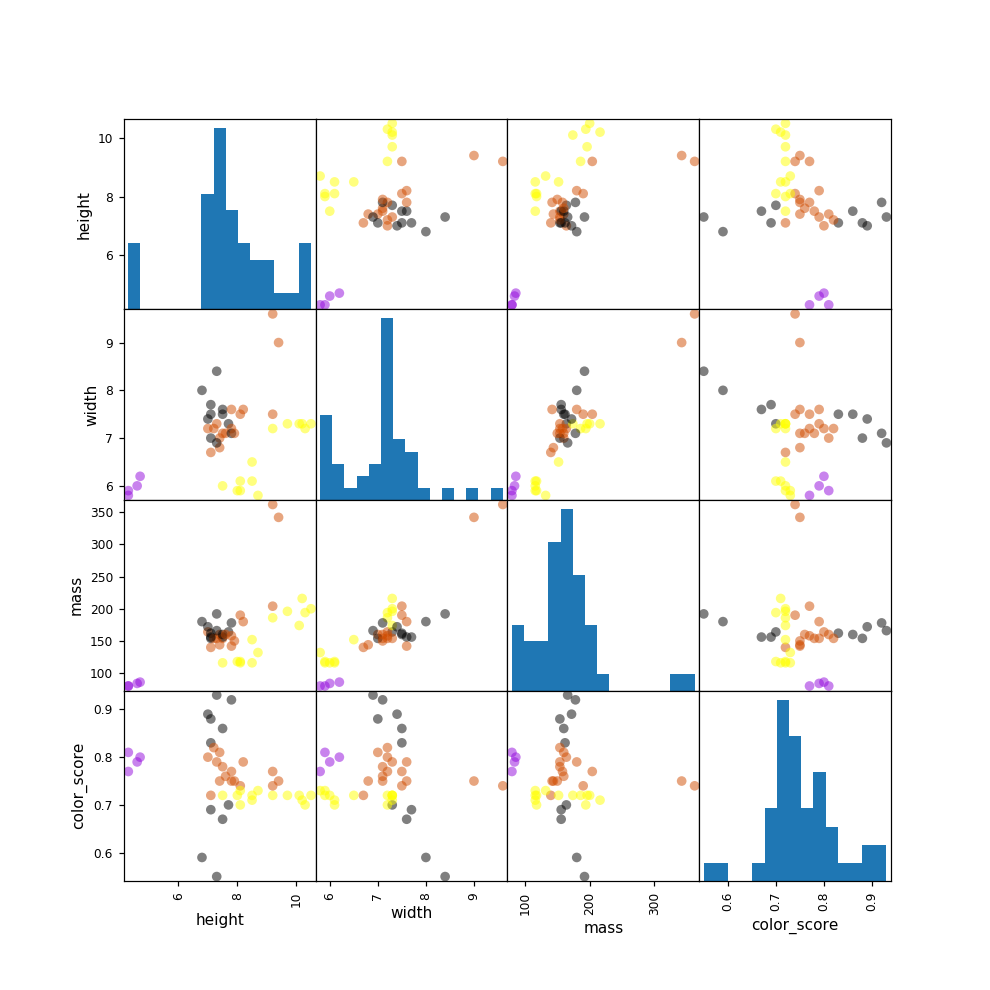

In [13]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
X=fruits[['height', 'width', 'mass', 'color_score']]
y=fruits['fruit_label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=21)
cmap=cm.get_cmap('gnuplot')
scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap);

<IPython.core.display.Javascript object>


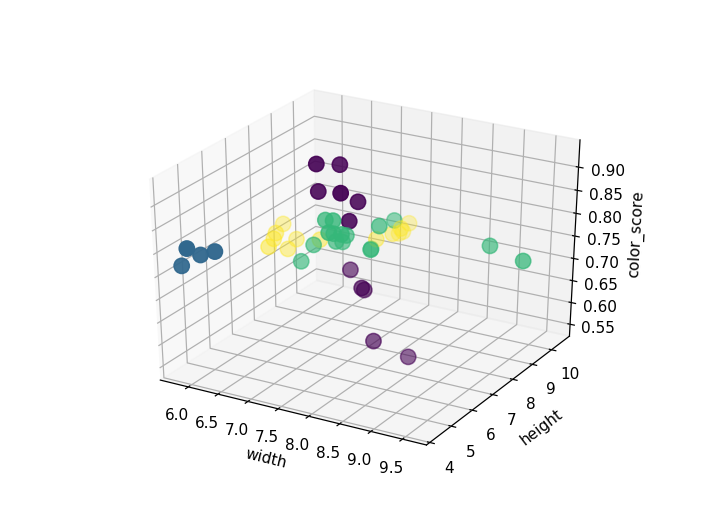

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker='o', s=100)

##Showing error in the line above

ax.set_xlabel('width')

ax.set_ylabel('height')

ax.set_zlabel('color_score')

plt.show()

In [16]:
#create train and test split
X=fruits[['height', 'width', 'mass', 'color_score']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=41)
print(X.shape)
print(X_test.shape)

(59, 4)
(15, 4)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.predict(X_test)


array([4, 1, 3, 4, 4, 3, 1, 4, 4, 1, 1, 3, 3, 3, 1], dtype=int64)

In [47]:
knn.score(X_test,y_test)

0.6

In [24]:
fruit_prediction = knn.predict([[10,6,8,10]])
fruit_prediction


array([2], dtype=int64)

In [25]:
fruit_prediction[0]

2

In [26]:
lookup_fruit_name[fruit_prediction[0]]

'mandarin'